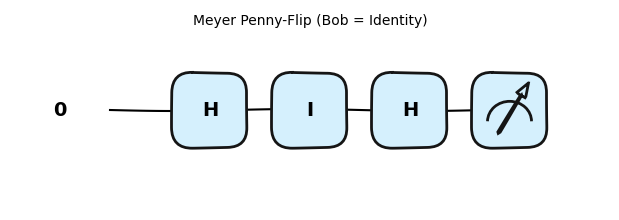

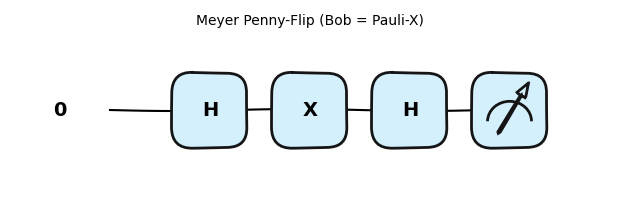

Meyer's Quantum Penny-Flip (Alice uses quantum moves; Bob classical)

Bob action: Do nothing (I)
Final statevector (amplitudes):
[1.+0.j 0.+0.j]
Measurement probabilities (|0>, |1>): [1. 0.]
----------------------------------------
Bob action: Flip (X)
Final statevector (amplitudes):
[1.+0.j 0.+0.j]
Measurement probabilities (|0>, |1>): [1. 0.]
----------------------------------------
Interpretation: Alice ends in |0> (Heads) with probability 1 in both cases → she always wins.


In [17]:
#when alice start with |0> [Head]

import pennylane as qml
import numpy as np

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def penny_game(bob_flips: bool = False):
    
    # Alice's first move: create |+> from |0>
    qml.Hadamard(wires=0)

    # Bob's classical move: either I (do nothing) or X (flip)
    if bob_flips:
        qml.PauliX(wires=0)
    else:
        qml.Identity(wires=0)     

    # Alice's final move: H again
    qml.Hadamard(wires=0)
    
    # Return the full statevector and probabilities for measurement in Z-basis
    return qml.state(), qml.probs(wires=0)

drawer = qml.draw_mpl(penny_game, style="pennylane_sketch")
fig, ax = drawer(bob_flips=False) 
fig.suptitle("Meyer Penny-Flip (Bob = Identity)", fontsize=10)
plt.show()

fig, ax = drawer(bob_flips=True)
fig.suptitle("Meyer Penny-Flip (Bob = Pauli-X)", fontsize=10)
plt.show()

def pretty_print_result(bob_flips: bool):
    state, probs = penny_game(bob_flips)
    print("Bob action:", "Flip (X)" if bob_flips else "Do nothing (I)")
    print("Final statevector (amplitudes):")
    print(np.round(state, 6))
    print("Measurement probabilities (|0>, |1>):", np.round(probs, 6))
    print("-" * 40)

if __name__ == "__main__":
    print("Meyer's Quantum Penny-Flip (Alice uses quantum moves; Bob classical)\n")
    pretty_print_result(bob_flips=False)  
    pretty_print_result(bob_flips=True)  
    print("Interpretation: Alice ends in |0> (Heads) with probability 1 in both cases → she always wins.")


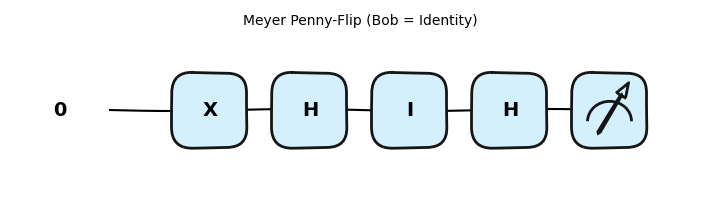

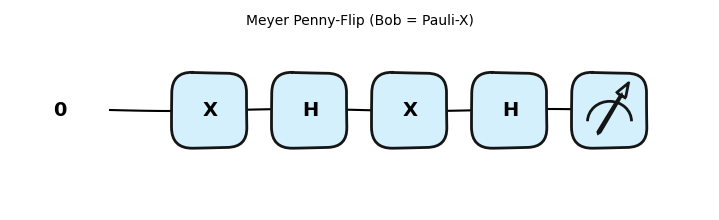

Meyer's Quantum Penny-Flip (Alice uses quantum moves; Bob classical)

Bob action: Do nothing (I)
Final statevector (amplitudes):
[0.+0.j 1.+0.j]
Measurement probabilities (|0>, |1>): [0. 1.]
----------------------------------------
Bob action: Flip (X)
Final statevector (amplitudes):
[ 0.+0.j -1.+0.j]
Measurement probabilities (|0>, |1>): [0. 1.]
----------------------------------------
Interpretation: Alice ends in |1> (Tails) with probability 1 in both cases → she always wins.


In [20]:
#when alice start with |1> [Tail]

import pennylane as qml
import numpy as np

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def penny_game(bob_flips: bool = False):
    
    # Alice's first move: create |-> from |1>
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)

    # Bob's classical move: either I (do nothing) or X (flip)
    if bob_flips:
        qml.PauliX(wires=0)
    else:
        qml.Identity(wires=0)     

    # Alice's final move: H again
    qml.Hadamard(wires=0)
    
    # Return the full statevector and probabilities for measurement in Z-basis
    return qml.state(), qml.probs(wires=0)

drawer = qml.draw_mpl(penny_game, style="pennylane_sketch")
fig, ax = drawer(bob_flips=False) 
fig.suptitle("Meyer Penny-Flip (Bob = Identity)", fontsize=10)
plt.show()

fig, ax = drawer(bob_flips=True)
fig.suptitle("Meyer Penny-Flip (Bob = Pauli-X)", fontsize=10)
plt.show()

def pretty_print_result(bob_flips: bool):
    state, probs = penny_game(bob_flips)
    print("Bob action:", "Flip (X)" if bob_flips else "Do nothing (I)")
    print("Final statevector (amplitudes):")
    print(np.round(state, 6))
    print("Measurement probabilities (|0>, |1>):", np.round(probs, 6))
    print("-" * 40)

if __name__ == "__main__":
    print("Meyer's Quantum Penny-Flip (Alice uses quantum moves; Bob classical)\n")
    pretty_print_result(bob_flips=False)  
    pretty_print_result(bob_flips=True)  
    print("Interpretation: Alice ends in |1> (Tails) with probability 1 in both cases → she always wins.")


In short: The power of quantum superposition and the symmetry of the Hadamard transform make Bob’s classical strategies ineffective, guaranteeing Alice’s victory every time.